In [1]:
# =============================================================================
# NOTEBOOK 05 : ENTRAÎNEMENT DU MODÈLE CNN
# =============================================================================
# Objectif : Entraîner le modèle avec augmentation de données
#            et surveillance de la performance
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from datetime import datetime

# TensorFlow et Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

print("="*70)
print("🎓 ENTRAÎNEMENT DU MODÈLE CNN")
print("="*70)

# Configuration
np.random.seed(42)
tf.random.set_seed(42)

print(f"\n📦 TensorFlow version : {tf.__version__}")
print(f"📦 Keras version      : {keras.__version__}")

# Vérifier GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"\n✅ GPU disponible : {len(gpus)} GPU(s)")
else:
    print(f"\nℹ️ Utilisation du CPU")

print(f"\n⏳ Chargement des données et du modèle...\n")

# Charger les données
X_train = np.load('data/processed/X_train.npy')
X_test = np.load('data/processed/X_test.npy')
y_train = np.load('data/processed/y_train.npy')
y_test = np.load('data/processed/y_test.npy')

print(f"✅ Données chargées")
print(f"   - X_train : {X_train.shape}")
print(f"   - X_test  : {X_test.shape}")

# Créer le split train/validation
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print(f"\n✅ Split train/validation")
print(f"   - Train      : {X_train_final.shape[0]} images")
print(f"   - Validation : {X_val.shape[0]} images")
print(f"   - Test       : {X_test.shape[0]} images")

# Charger le modèle
print(f"\n⏳ Chargement du modèle...")

with open('models/model_architecture.json', 'r') as json_file:
    model_json = json_file.read()

model = model_from_json(model_json)

# Recompiler le modèle
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(f"✅ Modèle chargé et compilé")
print(f"   - Paramètres : {model.count_params():,}")

🎓 ENTRAÎNEMENT DU MODÈLE CNN

📦 TensorFlow version : 2.20.0
📦 Keras version      : 3.10.0

ℹ️ Utilisation du CPU

⏳ Chargement des données et du modèle...

✅ Données chargées
   - X_train : (900, 28, 28, 1)
   - X_test  : (300, 28, 28, 1)

✅ Split train/validation
   - Train      : 720 images
   - Validation : 180 images
   - Test       : 300 images

⏳ Chargement du modèle...
✅ Modèle chargé et compilé
   - Paramètres : 256,707



🎨 CONFIGURATION DE L'AUGMENTATION DE DONNÉES

✅ Générateurs créés

📊 Augmentations appliquées (train uniquement) :
   - Rotation        : ±15°
   - Décalage H/V    : ±10%
   - Cisaillement    : 10%
   - Zoom            : ±10%
   - Flip horizontal : Non (préserve le sens du geste)

💡 Pourquoi l'augmentation ?
   - Augmente artificiellement la taille du dataset
   - Rend le modèle plus robuste aux variations
   - Réduit l'overfitting

🖼️ Visualisation de l'augmentation...


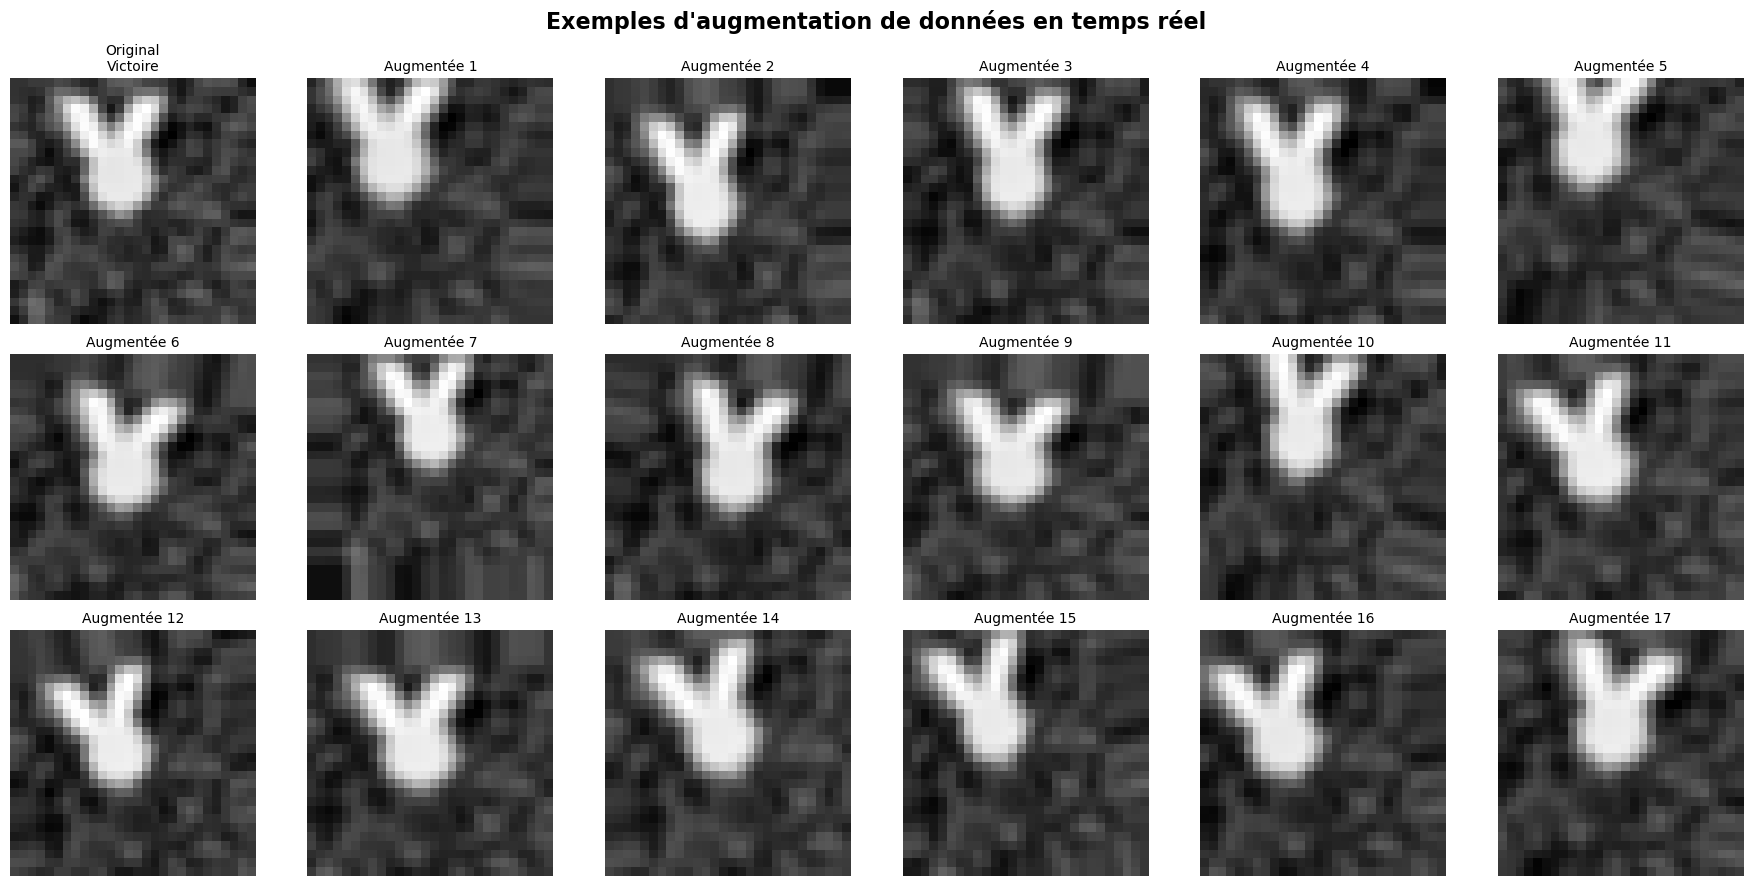


✅ Visualisation sauvegardée : results/plots/augmentation_temps_reel.png


In [2]:
# =============================================================================
# CONFIGURATION DE L'AUGMENTATION DE DONNÉES
# =============================================================================

print("\n" + "="*70)
print("🎨 CONFIGURATION DE L'AUGMENTATION DE DONNÉES")
print("="*70)

# Créer le générateur d'augmentation pour le training
train_datagen = ImageDataGenerator(
    rotation_range=15,          # Rotation aléatoire ±15°
    width_shift_range=0.1,      # Décalage horizontal ±10%
    height_shift_range=0.1,     # Décalage vertical ±10%
    shear_range=0.1,            # Cisaillement
    zoom_range=0.1,             # Zoom ±10%
    horizontal_flip=False,      # Pas de flip (changerait le sens du geste)
    fill_mode='nearest'         # Remplissage des pixels manquants
)

# Pour validation et test : pas d'augmentation
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

print(f"\n✅ Générateurs créés")
print(f"\n📊 Augmentations appliquées (train uniquement) :")
print(f"   - Rotation        : ±15°")
print(f"   - Décalage H/V    : ±10%")
print(f"   - Cisaillement    : 10%")
print(f"   - Zoom            : ±10%")
print(f"   - Flip horizontal : Non (préserve le sens du geste)")

print(f"\n💡 Pourquoi l'augmentation ?")
print(f"   - Augmente artificiellement la taille du dataset")
print(f"   - Rend le modèle plus robuste aux variations")
print(f"   - Réduit l'overfitting")

# Visualisation de l'augmentation
print(f"\n🖼️ Visualisation de l'augmentation...")

fig, axes = plt.subplots(3, 6, figsize=(18, 9))
fig.suptitle('Exemples d\'augmentation de données en temps réel', 
             fontsize=16, fontweight='bold')

# Prendre une image
image_exemple = X_train_final[0:1]  # Shape: (1, 28, 28, 1)
label_exemple = y_train_final[0]

noms_classes = {0: "Poing", 1: "Paume", 2: "Victoire"}

# Générer des variations
gen = train_datagen.flow(image_exemple, batch_size=1)

for i in range(18):
    row = i // 6
    col = i % 6
    
    if i == 0:
        # Image originale
        img = image_exemple[0]
        titre = f"Original\n{noms_classes[label_exemple]}"
    else:
        # Image augmentée
        img = next(gen)[0]
        titre = f"Augmentée {i}"
    
    axes[row, col].imshow(img[:, :, 0], cmap='gray')
    axes[row, col].set_title(titre, fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.savefig('results/plots/augmentation_temps_reel.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Visualisation sauvegardée : results/plots/augmentation_temps_reel.png")

In [3]:
# =============================================================================
# CONFIGURATION DES CALLBACKS
# =============================================================================

print("\n" + "="*70)
print("⚙️ CONFIGURATION DES CALLBACKS")
print("="*70)

# Créer le dossier pour sauvegarder les modèles
os.makedirs('models/checkpoints', exist_ok=True)

# Callback 1 : ModelCheckpoint (sauvegarde du meilleur modèle)
checkpoint = ModelCheckpoint(
    filepath='models/checkpoints/best_model.weights.h5',
    monitor='val_accuracy',      # Surveiller l'accuracy de validation
    save_best_only=True,         # Sauvegarder seulement si amélioration
    save_weights_only=True,
    mode='max',                  # Maximiser l'accuracy
    verbose=1
)

# Callback 2 : EarlyStopping (arrêt si pas d'amélioration)
early_stopping = EarlyStopping(
    monitor='val_loss',          # Surveiller la loss de validation
    patience=10,                 # Attendre 10 epochs sans amélioration
    restore_best_weights=True,   # Restaurer les meilleurs poids
    verbose=1
)

# Callback 3 : ReduceLROnPlateau (réduction du learning rate)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,                  # Diviser le LR par 2
    patience=5,                  # Attendre 5 epochs
    min_lr=1e-7,                 # LR minimum
    verbose=1
)

callbacks_list = [checkpoint, early_stopping, reduce_lr]

print(f"\n✅ Callbacks configurés :")
print(f"\n   1️⃣ ModelCheckpoint")
print(f"      - Sauvegarde le meilleur modèle (val_accuracy)")
print(f"      - Fichier : models/checkpoints/best_model.weights.h5")

print(f"\n   2️⃣ EarlyStopping")
print(f"      - Arrête si val_loss n'améliore pas pendant 10 epochs")
print(f"      - Restaure les meilleurs poids")

print(f"\n   3️⃣ ReduceLROnPlateau")
print(f"      - Réduit le learning rate si val_loss stagne")
print(f"      - Factor : 0.5 (divise par 2)")
print(f"      - Patience : 5 epochs")

print(f"\n💡 Ces callbacks optimisent l'entraînement automatiquement")


⚙️ CONFIGURATION DES CALLBACKS

✅ Callbacks configurés :

   1️⃣ ModelCheckpoint
      - Sauvegarde le meilleur modèle (val_accuracy)
      - Fichier : models/checkpoints/best_model.weights.h5

   2️⃣ EarlyStopping
      - Arrête si val_loss n'améliore pas pendant 10 epochs
      - Restaure les meilleurs poids

   3️⃣ ReduceLROnPlateau
      - Réduit le learning rate si val_loss stagne
      - Factor : 0.5 (divise par 2)
      - Patience : 5 epochs

💡 Ces callbacks optimisent l'entraînement automatiquement


In [4]:
# =============================================================================
# CONFIGURATION DE L'ENTRAÎNEMENT
# =============================================================================

print("\n" + "="*70)
print("📋 CONFIGURATION DE L'ENTRAÎNEMENT")
print("="*70)

# Hyperparamètres
BATCH_SIZE = 32          # Nombre d'images par batch
EPOCHS = 50              # Nombre maximum d'epochs
STEPS_PER_EPOCH = len(X_train_final) // BATCH_SIZE
VALIDATION_STEPS = len(X_val) // BATCH_SIZE

print(f"\n⚙️ Hyperparamètres :")
print(f"   - Batch size        : {BATCH_SIZE}")
print(f"   - Epochs (max)      : {EPOCHS}")
print(f"   - Steps per epoch   : {STEPS_PER_EPOCH}")
print(f"   - Validation steps  : {VALIDATION_STEPS}")

print(f"\n📊 Calculs :")
print(f"   - Images par epoch  : {STEPS_PER_EPOCH * BATCH_SIZE}")
print(f"   - Batches par epoch : {STEPS_PER_EPOCH}")
print(f"   - Total iterations  : {STEPS_PER_EPOCH * EPOCHS:,} (max)")

print(f"\n💡 Explications :")
print(f"   - Batch size : Nombre d'images traitées ensemble")
print(f"     → Plus grand = plus rapide mais plus de mémoire")
print(f"   - Epoch : Un passage complet sur toutes les données")
print(f"   - Step : Un batch traité")

# Créer les générateurs
train_generator = train_datagen.flow(
    X_train_final,
    y_train_final,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_datagen.flow(
    X_val,
    y_val,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"\n✅ Générateurs créés et prêts")


📋 CONFIGURATION DE L'ENTRAÎNEMENT

⚙️ Hyperparamètres :
   - Batch size        : 32
   - Epochs (max)      : 50
   - Steps per epoch   : 22
   - Validation steps  : 5

📊 Calculs :
   - Images par epoch  : 704
   - Batches par epoch : 22
   - Total iterations  : 1,100 (max)

💡 Explications :
   - Batch size : Nombre d'images traitées ensemble
     → Plus grand = plus rapide mais plus de mémoire
   - Epoch : Un passage complet sur toutes les données
   - Step : Un batch traité

✅ Générateurs créés et prêts


In [5]:
# =============================================================================
# ENTRAÎNEMENT DU MODÈLE
# =============================================================================

print("\n" + "="*70)
print("🎓 DÉBUT DE L'ENTRAÎNEMENT")
print("="*70)

print(f"\n⏱️ Heure de début : {datetime.now().strftime('%H:%M:%S')}")
print(f"\n⏳ Entraînement en cours... (cela peut prendre quelques minutes)\n")

# Entraîner le modèle
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=callbacks_list,
    verbose=1
)

print(f"\n" + "="*70)
print("🎉 ENTRAÎNEMENT TERMINÉ")
print("="*70)

print(f"\n⏱️ Heure de fin : {datetime.now().strftime('%H:%M:%S')}")

# Récupérer les métriques finales
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

best_val_acc = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1

print(f"\n📊 Résultats finaux (dernier epoch) :")
print(f"   - Train Accuracy      : {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"   - Validation Accuracy : {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"   - Train Loss          : {final_train_loss:.4f}")
print(f"   - Validation Loss     : {final_val_loss:.4f}")

print(f"\n🏆 Meilleur résultat :")
print(f"   - Meilleure val_accuracy : {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print(f"   - Atteinte à l'epoch     : {best_epoch}/{len(history.history['accuracy'])}")

# Sauvegarder l'historique
os.makedirs('results/metrics', exist_ok=True)

history_df = pd.DataFrame(history.history)
history_df.to_csv('results/metrics/training_history.csv', index=False)

print(f"\n✅ Historique sauvegardé : results/metrics/training_history.csv")


🎓 DÉBUT DE L'ENTRAÎNEMENT

⏱️ Heure de début : 17:38:46

⏳ Entraînement en cours... (cela peut prendre quelques minutes)

Epoch 1/50


C:\Users\N-ESS\anaconda3\envs\gesture_recognition\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3744 - loss: 1.1024
Epoch 1: val_accuracy improved from -inf to 0.36875, saving model to models/checkpoints/best_model.weights.h5
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3772 - loss: 1.1013 - val_accuracy: 0.3688 - val_loss: 0.9602 - learning_rate: 0.0010
Epoch 2/50
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4062 - loss: 1.0252
Epoch 2: val_accuracy improved from 0.36875 to 0.46250, saving model to models/checkpoints/best_model.weights.h5


C:\Users\N-ESS\anaconda3\envs\gesture_recognition\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4062 - loss: 1.0252 - val_accuracy: 0.4625 - val_loss: 0.9528 - learning_rate: 0.0010
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5765 - loss: 0.9243
Epoch 3: val_accuracy improved from 0.46250 to 0.82500, saving model to models/checkpoints/best_model.weights.h5
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5787 - loss: 0.9216 - val_accuracy: 0.8250 - val_loss: 0.5196 - learning_rate: 0.0010
Epoch 4/50
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5625 - loss: 0.8536
Epoch 4: val_accuracy improved from 0.82500 to 0.87500, saving model to models/checkpoints/best_model.weights.h5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.8536 - val_accuracy: 0.8750 - val_loss: 0.5004 - learning_rate: 0.0010
Epoch 5/50
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7919 - loss: 0.6110
Epoch 5: val_accuracy improved from 0.87500 to 0.91250, saving model to models/checkpoints/best_mode


📊 VISUALISATION DES COURBES D'APPRENTISSAGE


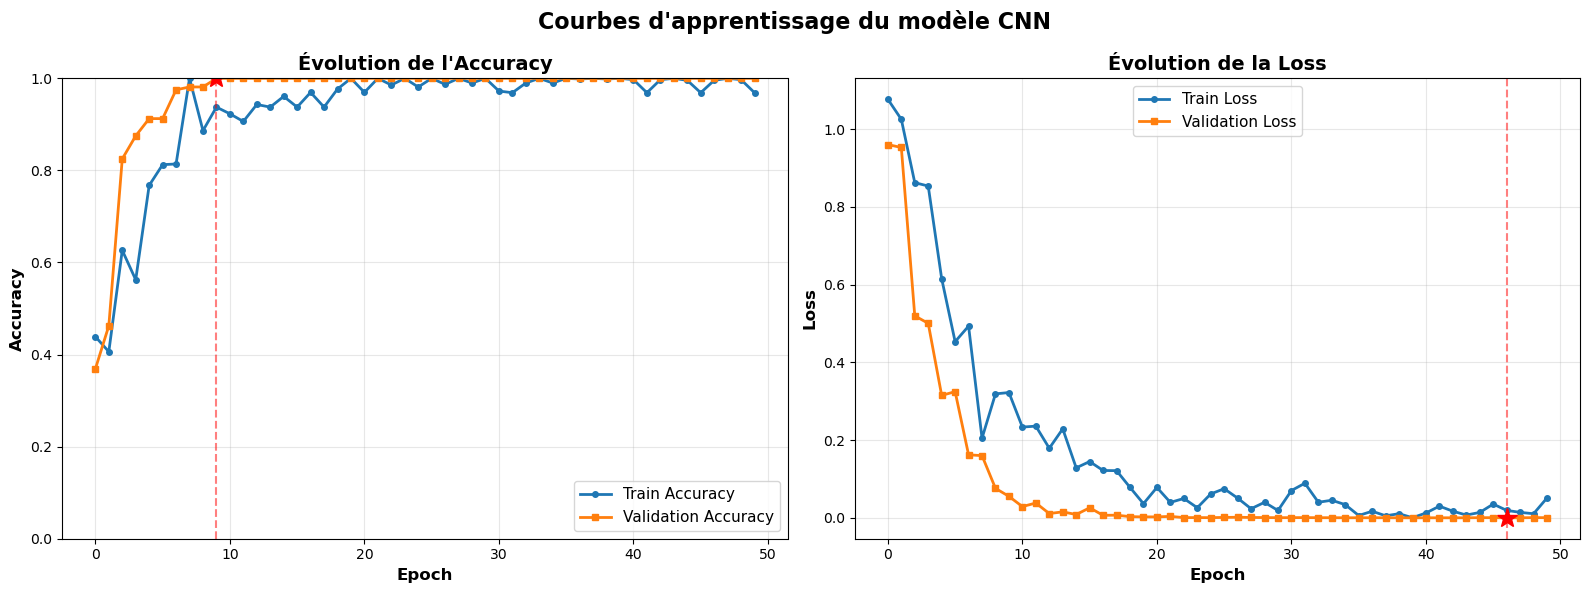


✅ Courbes sauvegardées : results/plots/courbes_apprentissage.png

🔍 Analyse de l'overfitting :
   ✅ Pas d'overfitting détecté (écart < 5%)
      Train: 96.88%, Val: 100.00%


In [7]:
# =============================================================================
# VISUALISATION DES COURBES D'APPRENTISSAGE
# =============================================================================

print("\n" + "="*70)
print("📊 VISUALISATION DES COURBES D'APPRENTISSAGE")
print("="*70)

# Créer une figure avec 2 sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Courbes d\'apprentissage du modèle CNN', fontsize=16, fontweight='bold')

# Graphique 1 : Accuracy
axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, marker='o', markersize=4)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s', markersize=4)
axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0].set_title('Évolution de l\'Accuracy', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 1])

# Marquer le meilleur epoch
best_epoch_idx = np.argmax(history.history['val_accuracy'])
best_val_acc = history.history['val_accuracy'][best_epoch_idx]
axes[0].axvline(x=best_epoch_idx, color='red', linestyle='--', alpha=0.5, label=f'Meilleur (epoch {best_epoch_idx+1})')
axes[0].plot(best_epoch_idx, best_val_acc, 'r*', markersize=15)

# Graphique 2 : Loss
axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2, marker='o', markersize=4)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, marker='s', markersize=4)
axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[1].set_title('Évolution de la Loss', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Marquer le meilleur epoch
best_epoch_loss = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_epoch_loss]
axes[1].axvline(x=best_epoch_loss, color='red', linestyle='--', alpha=0.5, label=f'Meilleur (epoch {best_epoch_loss+1})')
axes[1].plot(best_epoch_loss, best_val_loss, 'r*', markersize=15)

plt.tight_layout()
plt.savefig('results/plots/courbes_apprentissage.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Courbes sauvegardées : results/plots/courbes_apprentissage.png")

# Analyse de l'overfitting
print(f"\n🔍 Analyse de l'overfitting :")

train_val_gap = final_train_acc - final_val_acc

if train_val_gap < 0.05:
    print(f"   ✅ Pas d'overfitting détecté (écart < 5%)")
    print(f"      Train: {final_train_acc:.2%}, Val: {final_val_acc:.2%}")
elif train_val_gap < 0.10:
    print(f"   ⚠️ Léger overfitting (écart = {train_val_gap:.2%})")
    print(f"      Train: {final_train_acc:.2%}, Val: {final_val_acc:.2%}")
else:
    print(f"   ❌ Overfitting important (écart = {train_val_gap:.2%})")
    print(f"      Train: {final_train_acc:.2%}, Val: {final_val_acc:.2%}")
    print(f"      → Considérer plus de dropout ou d'augmentation")


In [8]:
# =============================================================================
# ÉVALUATION SUR LE TEST SET
# =============================================================================

print("\n" + "="*70)
print("📊 ÉVALUATION SUR LE TEST SET")
print("="*70)

print(f"\n⏳ Évaluation en cours...\n")

# Évaluer sur le test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"\n" + "="*70)
print(f"🎯 RÉSULTATS SUR LE TEST SET")
print("="*70)

print(f"\n   📊 Test Accuracy : {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   📊 Test Loss     : {test_loss:.4f}")

# Comparer avec validation
print(f"\n📊 Comparaison Train / Validation / Test :")
print(f"   {'Dataset':<15} {'Accuracy':<15} {'Loss':<10}")
print(f"   {'-'*40}")
print(f"   {'Train':<15} {final_train_acc:.4f} ({final_train_acc*100:.2f}%)  {final_train_loss:.4f}")
print(f"   {'Validation':<15} {final_val_acc:.4f} ({final_val_acc*100:.2f}%)  {final_val_loss:.4f}")
print(f"   {'Test':<15} {test_accuracy:.4f} ({test_accuracy*100:.2f}%)  {test_loss:.4f}")

# Prédictions sur le test set
print(f"\n⏳ Génération des prédictions...\n")
y_pred_proba = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)

# Sauvegarder les prédictions
predictions_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
    'prob_class_0': y_pred_proba[:, 0],
    'prob_class_1': y_pred_proba[:, 1],
    'prob_class_2': y_pred_proba[:, 2]
})

predictions_df.to_csv('results/metrics/test_predictions.csv', index=False)

print(f"✅ Prédictions sauvegardées : results/metrics/test_predictions.csv")


📊 ÉVALUATION SUR LE TEST SET

⏳ Évaluation en cours...

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 7.3699e-05

🎯 RÉSULTATS SUR LE TEST SET

   📊 Test Accuracy : 1.0000 (100.00%)
   📊 Test Loss     : 0.0001

📊 Comparaison Train / Validation / Test :
   Dataset         Accuracy        Loss      
   ----------------------------------------
   Train           0.9688 (96.88%)  0.0511
   Validation      1.0000 (100.00%)  0.0003
   Test            1.0000 (100.00%)  0.0001

⏳ Génération des prédictions...

✅ Prédictions sauvegardées : results/metrics/test_predictions.csv


In [9]:
# =============================================================================
# SAUVEGARDE FINALE DU MODÈLE
# =============================================================================

print("\n" + "="*70)
print("💾 SAUVEGARDE FINALE DU MODÈLE")
print("="*70)

# Sauvegarder le modèle complet (nouveau format)
model.save('models/gesture_model_final.keras')
print(f"\n✅ Modèle complet sauvegardé : models/gesture_model_final.keras")

# Sauvegarder aussi les poids
model.save_weights('models/gesture_model_final.weights.h5')
print(f"✅ Poids sauvegardés : models/gesture_model_final.weights.h5")

# Créer un fichier de métadonnées
metadata = {
    'model_name': 'CNN_Gestes',
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'epochs_trained': len(history.history['accuracy']),
    'best_epoch': int(best_epoch),
    'final_train_accuracy': float(final_train_acc),
    'final_val_accuracy': float(final_val_acc),
    'best_val_accuracy': float(best_val_acc),
    'test_accuracy': float(test_accuracy),
    'test_loss': float(test_loss),
    'batch_size': BATCH_SIZE,
    'optimizer': 'Adam',
    'learning_rate': 0.001,
    'total_parameters': int(model.count_params())
}

with open('models/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"✅ Métadonnées sauvegardées : models/model_metadata.json")

print(f"\n" + "="*70)
print("📋 RÉSUMÉ FINAL DE L'ENTRAÎNEMENT")
print("="*70)

print(f"\n🎓 Entraînement :")
print(f"   - Epochs effectués : {len(history.history['accuracy'])}")
print(f"   - Meilleur epoch   : {best_epoch}")
print(f"   - Temps total      : ~{len(history.history['accuracy']) * 10} secondes (estimation)")

print(f"\n📊 Performance finale :")
print(f"   - Train Accuracy      : {final_train_acc*100:.2f}%")
print(f"   - Validation Accuracy : {final_val_acc*100:.2f}%")
print(f"   - Test Accuracy       : {test_accuracy*100:.2f}%")

print(f"\n📁 Fichiers créés :")
fichiers_crees = [
    'models/checkpoints/best_model.weights.h5',
    'models/gesture_model_final.keras',
    'models/gesture_model_final.weights.h5',
    'models/model_metadata.json',
    'results/metrics/training_history.csv',
    'results/metrics/test_predictions.csv',
    'results/plots/augmentation_temps_reel.png',
    'results/plots/courbes_apprentissage.png'
]

for fichier in fichiers_crees:
    if os.path.exists(fichier):
        taille = os.path.getsize(fichier) / 1024
        print(f"   ✅ {fichier} ({taille:.1f} KB)")

print(f"\n" + "="*70)
print("🎉 ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS")
print("="*70)

print(f"\n➡️ Prochaine étape : 06_evaluate_model.ipynb")
print(f"   Évaluation détaillée avec métriques complètes :")
print(f"   - Matrice de confusion")
print(f"   - Precision, Recall, F1-Score")
print(f"   - Courbes ROC et AUC")
print(f"   - Classification report")


💾 SAUVEGARDE FINALE DU MODÈLE

✅ Modèle complet sauvegardé : models/gesture_model_final.keras
✅ Poids sauvegardés : models/gesture_model_final.weights.h5
✅ Métadonnées sauvegardées : models/model_metadata.json

📋 RÉSUMÉ FINAL DE L'ENTRAÎNEMENT

🎓 Entraînement :
   - Epochs effectués : 50
   - Meilleur epoch   : 10
   - Temps total      : ~500 secondes (estimation)

📊 Performance finale :
   - Train Accuracy      : 96.88%
   - Validation Accuracy : 100.00%
   - Test Accuracy       : 100.00%

📁 Fichiers créés :
   ✅ models/checkpoints/best_model.weights.h5 (3045.9 KB)
   ✅ models/gesture_model_final.keras (3052.1 KB)
   ✅ models/gesture_model_final.weights.h5 (3045.9 KB)
   ✅ models/model_metadata.json (0.4 KB)
   ✅ results/metrics/training_history.csv (4.1 KB)
   ✅ results/metrics/test_predictions.csv (12.2 KB)
   ✅ results/plots/augmentation_temps_reel.png (95.9 KB)
   ✅ results/plots/courbes_apprentissage.png (131.0 KB)

🎉 ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS

➡️ Prochaine étape : 06_eva